In [1]:
import sklearn.datasets
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

dataset = sklearn.datasets.load_breast_cancer()
# print(dataset)
X = dataset.data
Y = dataset.target
X_header = dataset.feature_names
Y_header = dataset.target_names

df = pd.DataFrame(X, columns=X_header)
df['class'] = Y

df_y = df['class']
df_x = df.drop(columns=['class'])

X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.1, stratify = df_y, random_state =1)


In [2]:
# Epochs Version
class Perceptron:
    def __init__ (self):
        self.w = None
        self.b = None
        
    def model(self,x):
        return 1 if (np.dot(x,self.w) >= self.b) else 0
    
    def predict(self,X):
        Y=[]
        for x in X:
            Y.append(self.model(x))
        return Y
    
    def fit(self, X, Y, epochs = 1, lr = 1):
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy ={}
        max_accuracy = 0
        wt_matrix = []
        for i in range(epochs):
            for x,y in zip(X,Y):
                y_pred = self.model(x)
                if y_pred == 0 and y == 1:
                    self.w = self.w + lr * x
                    self.b = self.b + lr * 1
                if y_pred == 1 and y == 0:
                    self.w = self.w - lr * x
                    self.b = self.b - lr * 1
            wt_matrix.append(self.w)
            accuracy[i] = accuracy_score(self.predict(X),Y)
            if accuracy[i] > max_accuracy:
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b
        plt.plot(accuracy.values())
        plt.show()
        print(max_accuracy)
        self.w = chkptw
        self.b = chkptb
        return np.array(wt_matrix)

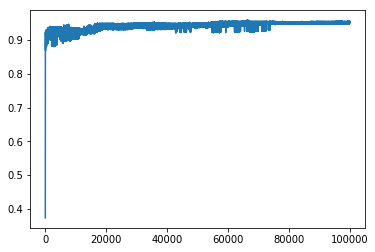

0.958984375
0.9298245614035088
555.35999999964


In [3]:
perceptron = Perceptron()

wt_matrix = perceptron.fit(X_train.values, Y_train.values, 100000, .01)
y_pred = perceptron.predict(X_test.values)
print(accuracy_score(y_pred, Y_test.values))
print(perceptron.b)

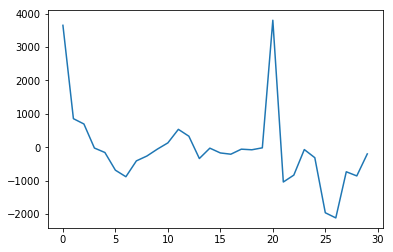

In [4]:
plt.plot(perceptron.w)
plt.show()

<class 'numpy.ndarray'>


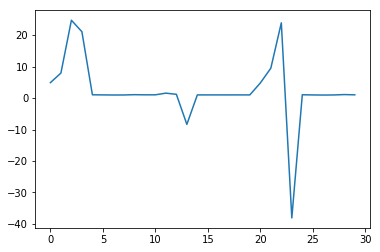

In [5]:
print(type(wt_matrix))
plt.plot(wt_matrix[0])
plt.show()

In [6]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

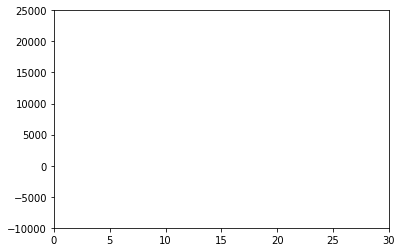

In [7]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-10000, 25000))

line, = ax.plot([], [], lw=2)

In [8]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i]
    line.set_data(x, y)
    return (line,)

In [9]:
anim = animation.FuncAnimation(fig, animate, frames=100000, interval=.1, blit=True)

In [10]:
HTML(anim.to_html5_video())